IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

INSERING THE CSV FILE

In [2]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


DATA EXPLORING :

    DATA UNDERSTANDING & CLEANING

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

SPLITING THE DATASET

In [7]:
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

In [8]:
x.shape, y.shape

((150, 4), (150,))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((30, 4), (30,), (120, 4), (120,))

BUILDING RANDOM FOREST CLASSIFIER MODEL

In [11]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


TRAIN THE MODEL

In [12]:
y_train_pred=rfc.predict(x_train)

In [13]:
y_train_pred.shape,y_train.shape

((120,), (120,))

TEST THE MODEL

In [14]:
y_test_pred = rfc.predict(x_test)

In [15]:
y_test_pred.shape,y_test.shape

((30,), (30,))

VISUALIZE THE TRAIN MODEL

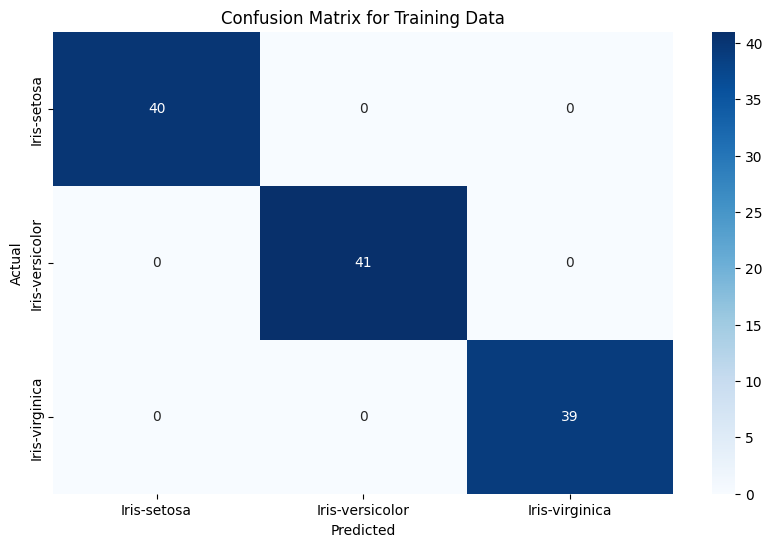

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')    
plt.show()

VISUALIZE THE TEST MODEL

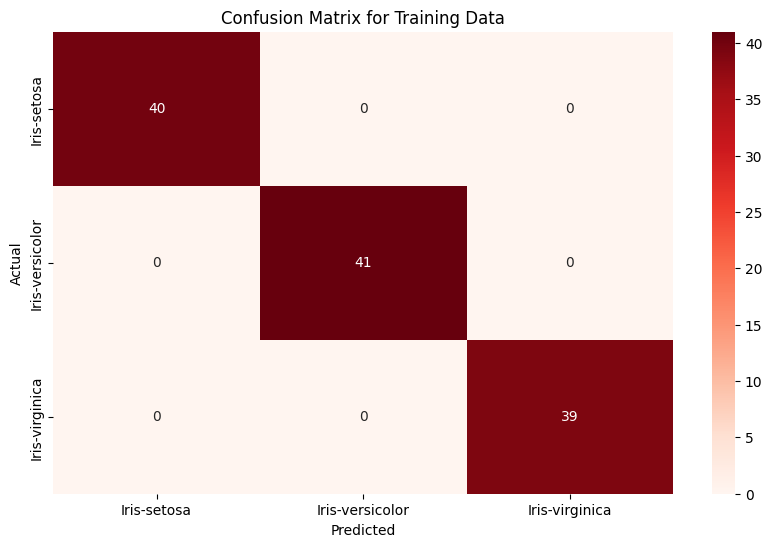

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(y_train, y_train_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Training Data')     
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

EVALUATE THE TRAIN MODEL

In [18]:
print("Accuracy = ",accuracy_score(y_train, y_train_pred))

Accuracy =  1.0


In [19]:
print("confusion_matrix = ",confusion_matrix(y_train, y_train_pred))

confusion_matrix =  [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


In [20]:
print("classification_report = ",classification_report(y_train, y_train_pred))

classification_report =                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        41
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



EVALUATE THE TEST MODEL

In [21]:
print("Accuracy = ", accuracy_score(y_test, y_test_pred))

Accuracy =  1.0


In [22]:
print("confusion_matrix = ", confusion_matrix(y_test, y_test_pred))

confusion_matrix =  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
print("classification_report = ", classification_report(y_test, y_test_pred))

classification_report =                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



FEATURES IMPORTANCE

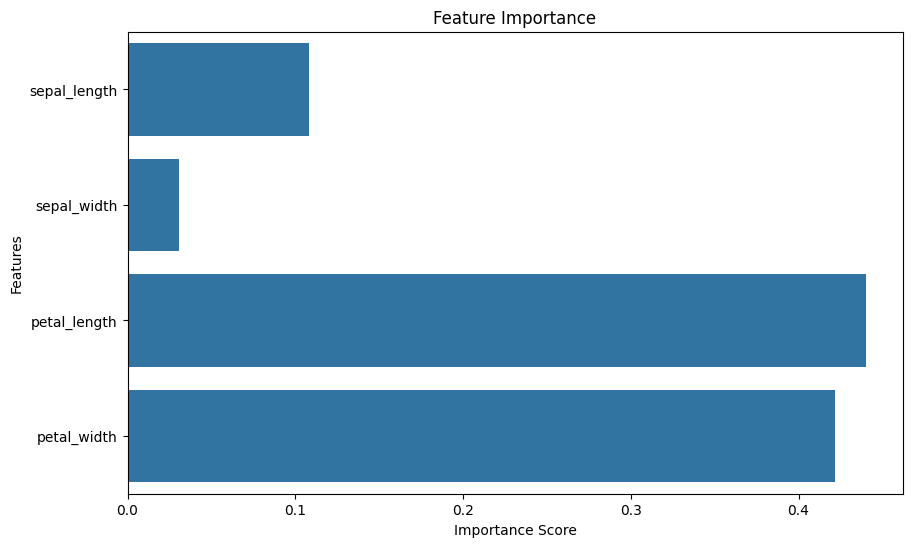

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rfc.feature_importances_, y=x.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')  
plt.show()